In [2]:
import numpy as np
import matplotlib.pyplot as plt
import audacity

import FluteTransients as ftr

%matplotlib notebook

In [3]:
# Listing relevant datafiles
acquisitions = [0, 1, 2]
runnames = np.arange(300, 675, 25)
RUNS = 15
CHANNEL_CONFIG = (1, 3, 0, 2)

dfilesT = []
dfilesC = []
for acq in acquisitions:
    dfilesT.append([])
    dfilesC.append([])
    for r, rn in enumerate(runnames):
        acqfilesT = "DATA/MAIN_4500rpm/freqchange/trill/%d_%d.aup" % (rn, acq)
        acqfilesC = "DATA/MAIN_4500rpm/freqchange/cross/%d_%d.aup" % (rn, acq)
        dfilesT[acq].append(acqfilesT)
        dfilesC[acq].append(acqfilesC)

In [4]:
# Obtaining fourier specrtum data
dataT = []
for acqno, acqfiles in enumerate(dfilesT):
    dataT.append([])
    for file in acqfiles:
        filedata = ftr.get_fsdata(file, *CHANNEL_CONFIG, nfft=2**15)
        dataT[acqno].append(filedata)

dataC = []
for acqno, acqfiles in enumerate(dfilesC):
    dataC.append([])
    for file in acqfiles:
        filedata = ftr.get_fsdata(file, *CHANNEL_CONFIG, nfft=2**15)
        dataC[acqno].append(filedata)

DATA/MAIN_4500rpm/freqchange/trill/300_0.aup
DATA/MAIN_4500rpm/freqchange/trill/325_0.aup
DATA/MAIN_4500rpm/freqchange/trill/350_0.aup
DATA/MAIN_4500rpm/freqchange/trill/375_0.aup
DATA/MAIN_4500rpm/freqchange/trill/400_0.aup
DATA/MAIN_4500rpm/freqchange/trill/425_0.aup
DATA/MAIN_4500rpm/freqchange/trill/450_0.aup
DATA/MAIN_4500rpm/freqchange/trill/475_0.aup
DATA/MAIN_4500rpm/freqchange/trill/500_0.aup
DATA/MAIN_4500rpm/freqchange/trill/525_0.aup
DATA/MAIN_4500rpm/freqchange/trill/550_0.aup
DATA/MAIN_4500rpm/freqchange/trill/575_0.aup
DATA/MAIN_4500rpm/freqchange/trill/600_0.aup
DATA/MAIN_4500rpm/freqchange/trill/625_0.aup
DATA/MAIN_4500rpm/freqchange/trill/650_0.aup
DATA/MAIN_4500rpm/freqchange/trill/300_1.aup
DATA/MAIN_4500rpm/freqchange/trill/325_1.aup
DATA/MAIN_4500rpm/freqchange/trill/350_1.aup
DATA/MAIN_4500rpm/freqchange/trill/375_1.aup
DATA/MAIN_4500rpm/freqchange/trill/400_1.aup
DATA/MAIN_4500rpm/freqchange/trill/425_1.aup
DATA/MAIN_4500rpm/freqchange/trill/450_1.aup
DATA/MAIN_

<IPython.core.display.Javascript object>


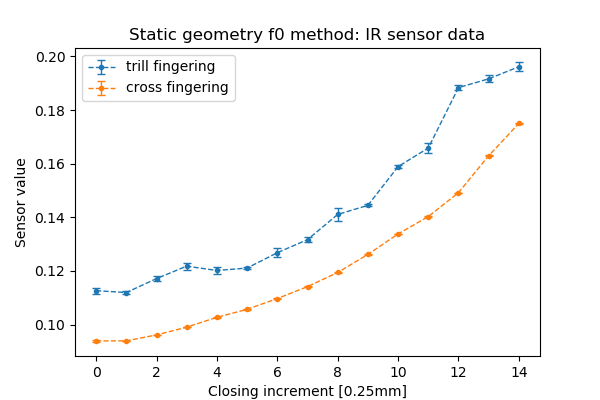

In [5]:
# Plotting infrared sensor values
IRsensT = []
for acqno, acqdata in enumerate(dataT):
    IRvals = []
    for rdata in acqdata:
        IRvals.append(rdata['ir'])
    IRsensT.append(IRvals)

meanIRsensT = np.mean(IRsensT, axis=0)
stdevsIRsensT = ftr.get_stdevs(IRsensT, meanIRsensT)
errIRnormT = stdevsIRsensT/meanIRsensT

IRsensC = []
for acqno, acqdata in enumerate(dataC):
    IRvals = []
    for rdata in acqdata:
        IRvals.append(rdata['ir'])
    IRsensC.append(IRvals)

meanIRsensC = np.mean(IRsensC, axis=0)
stdevsIRsensC = ftr.get_stdevs(IRsensC, meanIRsensC)
errIRnormC = stdevsIRsensC/meanIRsensC

plt.figure(figsize=(6,4))
plt.title('Static geometry f0 method: IR sensor data')
plt.xlabel('Closing increment [0.25mm]')
plt.ylabel('Sensor value')
plt.errorbar(np.arange(RUNS), meanIRsensT, yerr=stdevsIRsensT,
               ls='--', lw=1, marker='.', capsize=3, label='trill fingering')
plt.errorbar(np.arange(RUNS), meanIRsensC, yerr=stdevsIRsensC,
               ls='--', lw=1, marker='.', capsize=3, label='cross fingering')
plt.legend()
plt.savefig('F0_IR.png')